# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [46]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
X.shape, y.shape

((1460, 80), (1460,))

In [309]:
y.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [195]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=4)

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [196]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f4362127760>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [197]:
preproc.fit(X_train, y_train)
X_train_scaled= preproc.transform(X_train)

In [198]:
X_train_scaled.shape

(1022, 159)

In [201]:
X_val_scaled= preproc.transform(X_val)

In [202]:
X_val_scaled.shape

(438, 159)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [375]:
def initialize_model(input_dim):
    model= Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
#     model.add(layers.Dense(3, activation='relu'))
#     model.add(layers.Dense(2, activation='relu'))


    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='msle',
                  optimizer='adam') 
#                   metrics=[rmsle])
    return model


In [376]:
model= initialize_model(input_dim=159)

In [377]:
model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_338 (Dense)           (None, 20)                3200      
                                                                 
 dense_339 (Dense)           (None, 10)                210       
                                                                 
 dense_340 (Dense)           (None, 5)                 55        
                                                                 
 dense_341 (Dense)           (None, 1)                 6         
                                                                 
Total params: 3,471
Trainable params: 3,471
Non-trainable params: 0
_________________________________________________________________


❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [378]:
history= model.fit(X_train_scaled, y_train, batch_size=10, epochs=300, validation_data=(X_val_scaled,y_val))

Epoch 1/300
103/103 [==============================] - 1s 3ms/step - loss: 129.0532 - val_loss: 110.8630
Epoch 2/300
103/103 [==============================] - 0s 2ms/step - loss: 97.0703 - val_loss: 85.4017
Epoch 3/300
103/103 [==============================] - 0s 2ms/step - loss: 78.1304 - val_loss: 71.3513
Epoch 4/300
103/103 [==============================] - 0s 2ms/step - loss: 66.6426 - val_loss: 61.9559
Epoch 5/300
103/103 [==============================] - 0s 2ms/step - loss: 58.5483 - val_loss: 55.0006
Epoch 6/300
103/103 [==============================] - 0s 2ms/step - loss: 52.3691 - val_loss: 49.5308
Epoch 7/300
103/103 [==============================] - 0s 2ms/step - loss: 47.4127 - val_loss: 45.0591
Epoch 8/300
103/103 [==============================] - 0s 2ms/step - loss: 43.3075 - val_loss: 41.3063
Epoch 9/300
103/103 [==============================] - 0s 2ms/step - loss: 39.8229 - val_loss: 38.0880
Epoch 10/300
103/103 [==============================] - 0s 2ms/step - l

Epoch 81/300
103/103 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.3080
Epoch 82/300
103/103 [==============================] - 0s 2ms/step - loss: 0.3173 - val_loss: 0.2807
Epoch 83/300
103/103 [==============================] - 0s 2ms/step - loss: 0.2905 - val_loss: 0.2556
Epoch 84/300
103/103 [==============================] - 0s 2ms/step - loss: 0.2664 - val_loss: 0.2336
Epoch 85/300
103/103 [==============================] - 0s 2ms/step - loss: 0.2447 - val_loss: 0.2133
Epoch 86/300
103/103 [==============================] - 0s 2ms/step - loss: 0.2253 - val_loss: 0.1955
Epoch 87/300
103/103 [==============================] - 0s 2ms/step - loss: 0.2078 - val_loss: 0.1797
Epoch 88/300
103/103 [==============================] - 0s 2ms/step - loss: 0.1923 - val_loss: 0.1655
Epoch 89/300
103/103 [==============================] - 0s 2ms/step - loss: 0.1785 - val_loss: 0.1530
Epoch 90/300
103/103 [==============================] - 0s 2ms/step - loss: 0.1665

103/103 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0435
Epoch 161/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0426
Epoch 162/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0418
Epoch 163/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0410
Epoch 164/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0402
Epoch 165/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0394
Epoch 166/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.0387
Epoch 167/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.0379
Epoch 168/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.0373
Epoch 169/300
103/103 [==============================] - 0s 2ms/step - loss: 0.0470 - v

103/103 [==============================] - 0s 3ms/step - loss: 0.0248 - val_loss: 0.0227
Epoch 240/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.0227
Epoch 241/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.0226
Epoch 242/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.0226
Epoch 243/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0226
Epoch 244/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0226
Epoch 245/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0225
Epoch 246/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0225
Epoch 247/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0224
Epoch 248/300
103/103 [==============================] - 0s 3ms/step - loss: 0.0239 - v

In [379]:
model.evaluate(X_val_scaled, y_val)**0.5

14/14 [==============================] - 0s 1ms/step - loss: 0.0210


0.14486008686742083

🎁 We coded a `plot_history` function that you can use to detect overfitting

In [ ]:
historyy.history['loss']

In [284]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

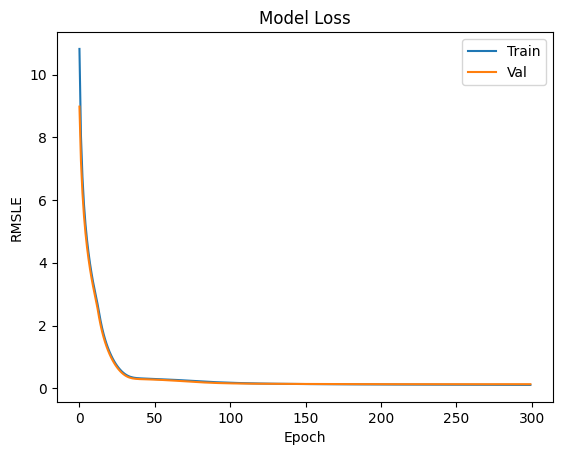

In [285]:
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [339]:
from sklearn.model_selection import KFold

In [384]:
def evaluate_model(X, y):
    rmsle_score= []
    min_rmsle=[]
    # Slicing the training set and the validation set
    kf= KFold(n_splits=5, shuffle=True, random_state=42)
    
    for train_index, valid_index in kf.split(X):

        X_train= X.iloc[train_index].copy()
        X_valid= X.iloc[valid_index].copy()
        y_train= y.iloc[train_index].copy()
        y_valid= y.iloc[valid_index].copy()
    # Preprocessing 
        preproc.fit(X_train,y_train)
        X_train_scaled= preproc.transform(X_train)
        X_valid_scaled= preproc.transform(X_valid)
    
    # Training the model on the preprocessed training dataset
        model= initialize_model(input_dim=X_train_scaled.shape[1])
        history= model.fit(X_train_scaled, y_train, batch_size=10, epochs=300, validation_data=(X_valid_scaled, y_valid))
    # Evaluating the model on the preprocessed validation dataset
        msle_score= model.evaluate(X_valid_scaled, y_valid)
        rmsle_score.append(msle_score**0.5)
        min_rmsle.append(np.sqrt(min(history.history['loss'])))
        
    
    return pd.DataFrame({
                'rmsle_final_epoch': rmsle_score,
                'rmsle_min': min_rmsle
                        })


In [385]:
evaluate_model(X, y)


Epoch 1/300
117/117 [==============================] - 1s 3ms/step - loss: 120.3913 - val_loss: 96.0336
Epoch 2/300
117/117 [==============================] - 0s 2ms/step - loss: 81.8884 - val_loss: 69.3258
Epoch 3/300
117/117 [==============================] - 0s 2ms/step - loss: 61.3753 - val_loss: 53.8996
Epoch 4/300
117/117 [==============================] - 0s 2ms/step - loss: 48.9431 - val_loss: 43.9612
Epoch 5/300
117/117 [==============================] - 0s 2ms/step - loss: 40.8326 - val_loss: 37.4067
Epoch 6/300
117/117 [==============================] - 0s 2ms/step - loss: 35.2195 - val_loss: 32.6251
Epoch 7/300
117/117 [==============================] - 0s 2ms/step - loss: 30.9796 - val_loss: 28.8957
Epoch 8/300
117/117 [==============================] - 0s 2ms/step - loss: 27.6002 - val_loss: 25.8634
Epoch 9/300
117/117 [==============================] - 0s 2ms/step - loss: 24.4773 - val_loss: 22.6192
Epoch 10/300
117/117 [==============================] - 0s 2ms/step - lo

117/117 [==============================] - 0s 2ms/step - loss: 0.0864 - val_loss: 0.1059
Epoch 82/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0858 - val_loss: 0.1053
Epoch 83/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0852 - val_loss: 0.1046
Epoch 84/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0846 - val_loss: 0.1039
Epoch 85/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0840 - val_loss: 0.1032
Epoch 86/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0833 - val_loss: 0.1024
Epoch 87/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0826 - val_loss: 0.1017
Epoch 88/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0819 - val_loss: 0.1008
Epoch 89/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0812 - val_loss: 0.1000
Epoch 90/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0804 - val_loss: 

Epoch 161/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0348
Epoch 162/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0343
Epoch 163/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 0.0342
Epoch 164/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0339
Epoch 165/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0336
Epoch 166/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0335
Epoch 167/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0333
Epoch 168/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0332
Epoch 169/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0331
Epoch 170/300
117/117 [==============================] - 0s 2ms/step - lo

117/117 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0254
Epoch 241/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0253
Epoch 242/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0252
Epoch 243/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0252
Epoch 244/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0252
Epoch 245/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0250
Epoch 246/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0249
Epoch 247/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0250
Epoch 248/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0248
Epoch 249/300
117/117 [==============================] - 0s 2ms/step - loss: 0.0183 - v

Epoch 19/300
117/117 [==============================] - 0s 2ms/step - loss: 11.1870 - val_loss: 10.8560
Epoch 20/300
117/117 [==============================] - 0s 2ms/step - loss: 10.2228 - val_loss: 9.9425
Epoch 21/300
117/117 [==============================] - 0s 2ms/step - loss: 9.3676 - val_loss: 9.1288
Epoch 22/300
117/117 [==============================] - 0s 2ms/step - loss: 8.6025 - val_loss: 8.3961
Epoch 23/300
117/117 [==============================] - 0s 2ms/step - loss: 7.9127 - val_loss: 7.7347
Epoch 24/300
117/117 [==============================] - 0s 3ms/step - loss: 7.2874 - val_loss: 7.1313
Epoch 25/300
117/117 [==============================] - 0s 2ms/step - loss: 6.7174 - val_loss: 6.5816
Epoch 26/300
117/117 [==============================] - 0s 2ms/step - loss: 6.1961 - val_loss: 6.0775
Epoch 27/300
117/117 [==============================] - 0s 2ms/step - loss: 5.7178 - val_loss: 5.6133
Epoch 28/300
117/117 [==============================] - 0s 2ms/step - loss: 5.2

117/117 [==============================] - 0s 3ms/step - loss: 0.0792 - val_loss: 0.0752
Epoch 100/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0782 - val_loss: 0.0742
Epoch 101/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.0733
Epoch 102/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0762 - val_loss: 0.0724
Epoch 103/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0751 - val_loss: 0.0714
Epoch 104/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0741 - val_loss: 0.0703
Epoch 105/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.0694
Epoch 106/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0720 - val_loss: 0.0683
Epoch 107/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0709 - val_loss: 0.0673
Epoch 108/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0698 - v

117/117 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0271
Epoch 179/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0269
Epoch 180/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0248 - val_loss: 0.0268
Epoch 181/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.0268
Epoch 182/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.0266
Epoch 183/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0265
Epoch 184/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0264
Epoch 185/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.0263
Epoch 186/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0262
Epoch 187/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0235 - v

117/117 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.0234
Epoch 258/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0234
Epoch 259/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.0234
Epoch 260/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.0234
Epoch 261/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.0233
Epoch 262/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0234
Epoch 263/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0234
Epoch 264/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0234
Epoch 265/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0233
Epoch 266/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0161 - v

117/117 [==============================] - 0s 4ms/step - loss: 1.4574 - val_loss: 1.3751
Epoch 37/300
117/117 [==============================] - 0s 4ms/step - loss: 1.3160 - val_loss: 1.2390
Epoch 38/300
117/117 [==============================] - 0s 4ms/step - loss: 1.1865 - val_loss: 1.1147
Epoch 39/300
117/117 [==============================] - 0s 3ms/step - loss: 1.0681 - val_loss: 1.0012
Epoch 40/300
117/117 [==============================] - 0s 4ms/step - loss: 0.9600 - val_loss: 0.8974
Epoch 41/300
117/117 [==============================] - 0s 4ms/step - loss: 0.8615 - val_loss: 0.8035
Epoch 42/300
117/117 [==============================] - 0s 4ms/step - loss: 0.7721 - val_loss: 0.7179
Epoch 43/300
117/117 [==============================] - 0s 4ms/step - loss: 0.6909 - val_loss: 0.6403
Epoch 44/300
117/117 [==============================] - 0s 4ms/step - loss: 0.6175 - val_loss: 0.5698
Epoch 45/300
117/117 [==============================] - 0s 3ms/step - loss: 0.5512 - val_loss: 

117/117 [==============================] - 0s 3ms/step - loss: 0.0456 - val_loss: 0.0393
Epoch 117/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.0386
Epoch 118/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.0379
Epoch 119/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0425 - val_loss: 0.0373
Epoch 120/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0367
Epoch 121/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0362
Epoch 122/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0356
Epoch 123/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0351
Epoch 124/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0347
Epoch 125/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0372 - v

117/117 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0247
Epoch 196/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0247
Epoch 197/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0247
Epoch 198/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0247
Epoch 199/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0247
Epoch 200/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.0247
Epoch 201/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0250
Epoch 202/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0247
Epoch 203/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0248
Epoch 204/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0153 - v

117/117 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0262
Epoch 275/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0263
Epoch 276/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0262
Epoch 277/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0262
Epoch 278/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0263
Epoch 279/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0264
Epoch 280/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0263
Epoch 281/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0264
Epoch 282/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0264
Epoch 283/300
117/117 [==============================] - 1s 5ms/step - loss: 0.0114 - v

117/117 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3548
Epoch 54/300
117/117 [==============================] - 0s 4ms/step - loss: 0.3291 - val_loss: 0.3179
Epoch 55/300
117/117 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.2857
Epoch 56/300
117/117 [==============================] - 0s 3ms/step - loss: 0.2629 - val_loss: 0.2575
Epoch 57/300
117/117 [==============================] - 0s 3ms/step - loss: 0.2357 - val_loss: 0.2327
Epoch 58/300
117/117 [==============================] - 0s 3ms/step - loss: 0.2119 - val_loss: 0.2110
Epoch 59/300
117/117 [==============================] - 0s 3ms/step - loss: 0.1912 - val_loss: 0.1923
Epoch 60/300
117/117 [==============================] - 0s 3ms/step - loss: 0.1734 - val_loss: 0.1762
Epoch 61/300
117/117 [==============================] - 0s 3ms/step - loss: 0.1582 - val_loss: 0.1628
Epoch 62/300
117/117 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 

117/117 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.0413
Epoch 134/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.0405
Epoch 135/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.0397
Epoch 136/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.0390
Epoch 137/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.0384
Epoch 138/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0378
Epoch 139/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.0372
Epoch 140/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.0366
Epoch 141/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.0361
Epoch 142/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0306 - v

117/117 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.0230
Epoch 213/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0230
Epoch 214/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0229
Epoch 215/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0229
Epoch 216/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0229
Epoch 217/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0228
Epoch 218/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0228
Epoch 219/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0227
Epoch 220/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0226
Epoch 221/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0188 - v

117/117 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0208
Epoch 292/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0208
Epoch 293/300
117/117 [==============================] - 1s 4ms/step - loss: 0.0162 - val_loss: 0.0208
Epoch 294/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0208
Epoch 295/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0207
Epoch 296/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0207
Epoch 297/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0207
Epoch 298/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0207
Epoch 299/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0207
Epoch 300/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch

117/117 [==============================] - 0s 3ms/step - loss: 0.0914 - val_loss: 0.0763
Epoch 71/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0906 - val_loss: 0.0757
Epoch 72/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0898 - val_loss: 0.0751
Epoch 73/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0890 - val_loss: 0.0744
Epoch 74/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.0737
Epoch 75/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0873 - val_loss: 0.0731
Epoch 76/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0864 - val_loss: 0.0724
Epoch 77/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0855 - val_loss: 0.0717
Epoch 78/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.0709
Epoch 79/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0837 - val_loss: 

Epoch 150/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0253
Epoch 151/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.0252
Epoch 152/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.0250
Epoch 153/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0249
Epoch 154/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0247
Epoch 155/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.0245
Epoch 156/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 157/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0243
Epoch 158/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0241
Epoch 159/300
117/117 [==============================] - 0s 3ms/step - lo

117/117 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0185
Epoch 230/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0185
Epoch 231/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0186
Epoch 232/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0183
Epoch 233/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0183
Epoch 234/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0183
Epoch 235/300
117/117 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0182
Epoch 236/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0182
Epoch 237/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0182
Epoch 238/300
117/117 [==============================] - 0s 3ms/step - loss: 0.0175 - v

,rmsle_final_epoch,rmsle_min
0,0.149032,0.126645
1,0.151430,0.122506
2,0.163964,0.104636
3,0.143750,0.126720
4,0.131063,0.125480


### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [387]:
!pip install --quiet dask

In [388]:
from sklearn.model_selection import KFold
from dask import delayed

cv = 5
kf = KFold(n_splits = cv, shuffle = True)
f = delayed(evaluate_model)

results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
                  ]).compute(
                      scheduler='processes', num_workers=8)

pd.concat(results, axis=0).reset_index(drop=True)

2024-01-29 11:04:46.326928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 11:04:46.444280: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 11:04:46.448063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-29 11:04:46.448090: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

TypeError: evaluate_model() takes 2 positional arguments but 4 were given

Traceback
---------
  File "/home/parissa/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/dask/local.py", line 224, in execute_task
    result = _execute_task(task, data)
  File "/home/parissa/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/dask/core.py", line 119, in _execute_task
    return func(*(_execute_task(a, cache) for a in args))


### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [ ]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)
    
for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback = log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!